In [9]:
from tensorflow import keras
from tensorflow.keras import metrics, regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, BatchNormalization, MaxPooling1D, LSTM
from tensorflow.keras.layers import GlobalAveragePooling1D, Flatten
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
train_file = np.load('../data/shuffled_1D_train.npz')
X_train = train_file['arr_0']
y_train = train_file['arr_1']

val_file = np.load('../data/shuffled_1D_valid.npz')
X_val = val_file['arr_0']
y_val = val_file['arr_1']

test_file = np.load('../data/1D_test_arr.npz')
X_test = test_file['arr_0']
y_test = test_file['arr_1']

In [3]:
num_classes = 8
y_train = keras.utils.to_categorical(y_train, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [4]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(6394, 640, 7)
(800, 640, 7)
(800, 640, 7)


In [17]:
# # reshape the vectors
# X_train = X_train.reshape(6394, 640, 7, 1)
# X_val = X_val.reshape(800, 640, 7, 1)
# X_test = X_test.reshape(800, 640, 7, 1)

In [47]:
model = Sequential()

model.add(Conv1D(128,40, activation='relu', input_shape=(640, 7)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=4))

model.add(Conv1D(256,20, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=4))

model.add(Conv1D(512,20, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=4))

model.add(Flatten())
model.add(Dense(8, activation='softmax', name='final'))
model.compile(loss = keras.losses.categorical_crossentropy,
    optimizer=keras.optimizers.Adam(),
    metrics = ['accuracy', 'precision', 'recall']
)

model.fit(x=X_train, y=y_train,
          batch_size=64,
          epochs=50,
          verbose=1,
          validation_data=(X_val, y_val))

Epoch 1/50
100/100 [==============================] - 19s 191ms/step - loss: 1.9714 - accuracy: 0.3283 - val_loss: 9.0726 - val_accuracy: 0.1287
Epoch 2/50
100/100 [==============================] - 19s 188ms/step - loss: 1.6986 - accuracy: 0.3816 - val_loss: 3.2342 - val_accuracy: 0.1700
Epoch 3/50
100/100 [==============================] - 19s 188ms/step - loss: 1.6934 - accuracy: 0.3897 - val_loss: 6.2607 - val_accuracy: 0.1412
Epoch 4/50
100/100 [==============================] - 19s 188ms/step - loss: 1.6549 - accuracy: 0.4093 - val_loss: 5.3379 - val_accuracy: 0.1675
Epoch 5/50
100/100 [==============================] - 19s 189ms/step - loss: 1.5811 - accuracy: 0.4376 - val_loss: 5.9231 - val_accuracy: 0.1213
Epoch 6/50
100/100 [==============================] - 19s 188ms/step - loss: 1.5875 - accuracy: 0.4359 - val_loss: 11.9518 - val_accuracy: 0.1250
Epoch 7/50
100/100 [==============================] - 19s 187ms/step - loss: 1.5482 - accuracy: 0.4464 - val_loss: 11.2110 - val_

In [48]:
model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_31 (Conv1D)           (None, 601, 128)          35968     
_________________________________________________________________
batch_normalization_45 (Batc (None, 601, 128)          512       
_________________________________________________________________
max_pooling1d_23 (MaxPooling (None, 150, 128)          0         
_________________________________________________________________
conv1d_32 (Conv1D)           (None, 131, 256)          655616    
_________________________________________________________________
batch_normalization_46 (Batc (None, 131, 256)          1024      
_________________________________________________________________
max_pooling1d_24 (MaxPooling (None, 32, 256)           0         
_________________________________________________________________
conv1d_33 (Conv1D)           (None, 13, 512)         

In [70]:
model2 = Sequential()

model2.add(Conv1D(128,20, activation='relu', input_shape=(640, 7)))
model2.add(BatchNormalization())
model2.add(MaxPooling1D(pool_size=4))

model2.add(Conv1D(256,10, activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling1D(pool_size=4))

model2.add(Conv1D(512,10, activation='relu'))
model2.add(BatchNormalization())


model2.add(Conv1D(512,10, activation='relu'))
model2.add(BatchNormalization())

model2.add(Flatten())
model2.add(Dense(8, activation='softmax', name='final'))
model2.compile(loss = keras.losses.categorical_crossentropy,
    optimizer=keras.optimizers.Adam(),
    metrics = ['accuracy']
)

model2.fit(x=X_train, y=y_train,
           batch_size=64,
           epochs=50,
           verbose=1,
           validation_data=(X_val, y_val))

Epoch 1/50
100/100 [==============================] - 17s 174ms/step - loss: 2.4050 - accuracy: 0.2987 - val_loss: 3.4071 - val_accuracy: 0.1525
Epoch 2/50
100/100 [==============================] - 17s 169ms/step - loss: 2.1614 - accuracy: 0.3270 - val_loss: 9.8474 - val_accuracy: 0.1388
Epoch 3/50
100/100 [==============================] - 17s 174ms/step - loss: 2.2662 - accuracy: 0.3388 - val_loss: 48.3360 - val_accuracy: 0.1262
Epoch 4/50
100/100 [==============================] - 17s 171ms/step - loss: 2.0315 - accuracy: 0.3642 - val_loss: 19.3915 - val_accuracy: 0.1863
Epoch 5/50
100/100 [==============================] - 17s 173ms/step - loss: 2.0443 - accuracy: 0.3761 - val_loss: 25.7646 - val_accuracy: 0.1363
Epoch 6/50
100/100 [==============================] - 17s 172ms/step - loss: 2.0400 - accuracy: 0.3696 - val_loss: 32.5716 - val_accuracy: 0.1238
Epoch 7/50
100/100 [==============================] - 17s 172ms/step - loss: 1.9350 - accuracy: 0.4005 - val_loss: 10.3467 - v

# Conv1D-LSTM model

In [7]:
# Establish callbacks
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=20, verbose=0)
model_checkpoint = ModelCheckpoint('../CNN_LSTM_model/', monitor='val_loss', verbose=0, save_best_only=True, mode='min')

In [18]:
model2 = Sequential()

model2.add(Sequential([
    Conv1D(128,10, activation='relu', input_shape=(640, 7)),
    BatchNormalization(),
    MaxPooling1D(pool_size=4),
    Dropout(0.1)],
           name = 'Conv1'))

model2.add(Sequential([
    Conv1D(256,5, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=4),
    Dropout(0.1)],
           name = 'Conv2'))

model2.add(Sequential([
    Conv1D(512,5, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=4),
    Dropout(0.1)],
           name = 'Conv3'))

model2.add(Sequential([
    LSTM(96),
    BatchNormalization(),
    Dropout(0.1)],
           name = 'LSTM'))

model2.add(Sequential([
    Dense(64, activation='relu',bias_regularizer=regularizers.l2(1e-4)),
    Dropout(0.2)],
           name = 'Dense1'))

model2.add(Dense(8, activation='softmax'))
    
model2.compile(loss = keras.losses.categorical_crossentropy,
    optimizer=keras.optimizers.Adam(),
    metrics = ['accuracy']
)

history = model2.fit(x=X_train, y=y_train,
                     batch_size=64,
                     epochs=100,
                     verbose=1,
                     validation_data=(X_val, y_val),
                     callbacks=[early_stopping, model_checkpoint])

Epoch 1/100
100/100 [==============================] - 11s 111ms/step - loss: 1.8951 - accuracy: 0.3090 - val_loss: 2.2280 - val_accuracy: 0.1338
Epoch 2/100
100/100 [==============================] - 10s 104ms/step - loss: 1.7494 - accuracy: 0.3549 - val_loss: 2.3437 - val_accuracy: 0.1813
Epoch 3/100
100/100 [==============================] - 11s 106ms/step - loss: 1.7004 - accuracy: 0.3766 - val_loss: 2.3532 - val_accuracy: 0.1375
Epoch 4/100
100/100 [==============================] - 10s 102ms/step - loss: 1.6486 - accuracy: 0.3994 - val_loss: 2.8810 - val_accuracy: 0.1200
Epoch 5/100
100/100 [==============================] - 10s 103ms/step - loss: 1.6176 - accuracy: 0.4104 - val_loss: 2.7496 - val_accuracy: 0.1513
Epoch 6/100
100/100 [==============================] - 10s 104ms/step - loss: 1.5878 - accuracy: 0.4282 - val_loss: 2.2840 - val_accuracy: 0.1900
Epoch 7/100
100/100 [==============================] - 10s 103ms/step - loss: 1.5566 - accuracy: 0.4432 - val_loss: 2.6190 -

In [23]:
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Model '+ metric)
    plt.xlabel('Epochs')
    plt.ylabel(metric)
    plt.legend(['train', 'validation'])
    plt.show()

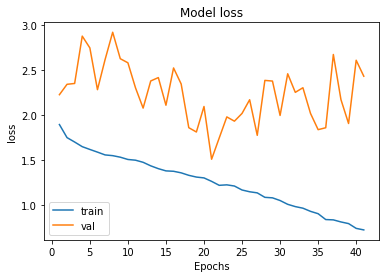

In [22]:
plot_metric(history, 'loss')

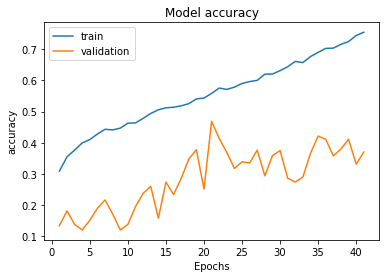

In [24]:
plot_metric(history, 'accuracy')

In [26]:
model2 = Sequential()

model2.add(Sequential([
    Conv1D(128,20, activation='relu', input_shape=(640, 7)),
    BatchNormalization(),
    MaxPooling1D(pool_size=4),
    Dropout(0.1)],
           name = 'Conv1'))

model2.add(Sequential([
    Conv1D(256,10, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=4),
    Dropout(0.1)],
           name = 'Conv2'))

model2.add(Sequential([
    Conv1D(512,10, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=4),
    Dropout(0.1)],
           name = 'Conv3'))

model2.add(Sequential([
    LSTM(25),
    BatchNormalization(),
    Dropout(0.1)],
           name = 'LSTM'))

model2.add(Sequential([
    Dense(64, activation='relu',bias_regularizer=regularizers.l2(1e-4)),
    Dropout(0.2)],
           name = 'Dense1'))

model2.add(Dense(8, activation='softmax'))
    
model2.compile(loss = keras.losses.categorical_crossentropy,
    optimizer=keras.optimizers.Adam(),
    metrics = ['accuracy']
)

history = model2.fit(x=X_train, y=y_train,
                     batch_size=64,
                     epochs=100,
                     verbose=1,
                     validation_data=(X_val, y_val))

Epoch 1/100
100/100 [==============================] - 13s 126ms/step - loss: 1.9102 - accuracy: 0.2850 - val_loss: 2.3328 - val_accuracy: 0.1300
Epoch 2/100
100/100 [==============================] - 11s 113ms/step - loss: 1.7786 - accuracy: 0.3303 - val_loss: 2.3611 - val_accuracy: 0.1388
Epoch 3/100
100/100 [==============================] - 11s 113ms/step - loss: 1.7382 - accuracy: 0.3547 - val_loss: 2.5087 - val_accuracy: 0.1750
Epoch 4/100
100/100 [==============================] - 11s 111ms/step - loss: 1.7280 - accuracy: 0.3575 - val_loss: 2.8961 - val_accuracy: 0.1488
Epoch 5/100
100/100 [==============================] - 11s 112ms/step - loss: 1.6988 - accuracy: 0.3703 - val_loss: 2.5262 - val_accuracy: 0.1912
Epoch 6/100
100/100 [==============================] - 11s 112ms/step - loss: 1.7080 - accuracy: 0.3693 - val_loss: 2.6226 - val_accuracy: 0.1725
Epoch 7/100
100/100 [==============================] - 11s 113ms/step - loss: 1.6709 - accuracy: 0.3893 - val_loss: 2.9047 -

Epoch 57/100
100/100 [==============================] - 11s 110ms/step - loss: 0.6973 - accuracy: 0.7591 - val_loss: 3.5974 - val_accuracy: 0.2250
Epoch 58/100
100/100 [==============================] - 11s 110ms/step - loss: 0.6956 - accuracy: 0.7510 - val_loss: 2.4904 - val_accuracy: 0.3725
Epoch 59/100
100/100 [==============================] - 11s 110ms/step - loss: 0.6730 - accuracy: 0.7671 - val_loss: 2.6795 - val_accuracy: 0.2862
Epoch 60/100
100/100 [==============================] - 11s 107ms/step - loss: 0.6553 - accuracy: 0.7693 - val_loss: 2.5602 - val_accuracy: 0.3688
Epoch 61/100
100/100 [==============================] - 11s 111ms/step - loss: 0.6564 - accuracy: 0.7709 - val_loss: 2.4392 - val_accuracy: 0.3350
Epoch 62/100
100/100 [==============================] - 11s 111ms/step - loss: 0.6053 - accuracy: 0.7915 - val_loss: 2.8091 - val_accuracy: 0.2450
Epoch 63/100
100/100 [==============================] - 11s 109ms/step - loss: 0.5926 - accuracy: 0.7975 - val_loss: 2